## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  24.840380  1144.526390  0.542068  10.341827  1.620428
1  79.525498  1185.002440  0.969383   9.003077  1.409407
2  23.230533  1276.218760  0.695390   3.157441  1.529556
3  95.085146  1129.223314  0.824419   1.162929  1.540013
4  95.690631  1567.629798  0.996580   5.411205  1.631887


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9538573	total: 68.2ms	remaining: 1m 8s
1:	learn: 0.9457808	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9371541	total: 69.3ms	remaining: 23s
3:	learn: 0.9293744	total: 69.9ms	remaining: 17.4s
4:	learn: 0.9224876	total: 70.5ms	remaining: 14s
5:	learn: 0.9145094	total: 71ms	remaining: 11.8s
6:	learn: 0.9055496	total: 71.5ms	remaining: 10.1s
7:	learn: 0.8977799	total: 71.9ms	remaining: 8.92s
8:	learn: 0.8887502	total: 72.4ms	remaining: 7.97s
9:	learn: 0.8793986	total: 73ms	remaining: 7.22s
10:	learn: 0.8709622	total: 73.5ms	remaining: 6.6s
11:	learn: 0.8626574	total: 74ms	remaining: 6.09s
12:	learn: 0.8542007	total: 74.5ms	remaining: 5.65s
13:	learn: 0.8458919	total: 74.9ms	remaining: 5.27s
14:	learn: 0.8371593	total: 75.3ms	remaining: 4.95s
15:	learn: 0.8316416	total: 75.8ms	remaining: 4.66s
16:	learn: 0.8238068	total: 76.1ms	remaining: 4.4s
17:	learn: 0.8181994	total: 76.5ms	remaining: 4.17s
18:	learn: 0.8115275	total: 76.9ms	remaining: 3.97s
19:	

92:	learn: 0.4736927	total: 109ms	remaining: 1.06s
93:	learn: 0.4704061	total: 110ms	remaining: 1.06s
94:	learn: 0.4676901	total: 110ms	remaining: 1.05s
95:	learn: 0.4648080	total: 110ms	remaining: 1.04s
96:	learn: 0.4622840	total: 111ms	remaining: 1.03s
97:	learn: 0.4599268	total: 111ms	remaining: 1.02s
98:	learn: 0.4574933	total: 112ms	remaining: 1.01s
99:	learn: 0.4544156	total: 112ms	remaining: 1.01s
100:	learn: 0.4516854	total: 112ms	remaining: 1s
101:	learn: 0.4486480	total: 113ms	remaining: 993ms
102:	learn: 0.4464839	total: 113ms	remaining: 985ms
103:	learn: 0.4435657	total: 114ms	remaining: 980ms
104:	learn: 0.4415766	total: 114ms	remaining: 973ms
105:	learn: 0.4390674	total: 115ms	remaining: 966ms
106:	learn: 0.4361637	total: 115ms	remaining: 960ms
107:	learn: 0.4334699	total: 116ms	remaining: 955ms
108:	learn: 0.4318803	total: 116ms	remaining: 949ms
109:	learn: 0.4290912	total: 116ms	remaining: 942ms
110:	learn: 0.4265341	total: 117ms	remaining: 936ms
111:	learn: 0.4242013	t

265:	learn: 0.2109049	total: 187ms	remaining: 515ms
266:	learn: 0.2098167	total: 187ms	remaining: 514ms
267:	learn: 0.2092421	total: 188ms	remaining: 513ms
268:	learn: 0.2085886	total: 188ms	remaining: 511ms
269:	learn: 0.2078791	total: 188ms	remaining: 509ms
270:	learn: 0.2072996	total: 189ms	remaining: 508ms
271:	learn: 0.2062023	total: 189ms	remaining: 507ms
272:	learn: 0.2057115	total: 190ms	remaining: 505ms
273:	learn: 0.2049205	total: 190ms	remaining: 504ms
274:	learn: 0.2040826	total: 191ms	remaining: 502ms
275:	learn: 0.2035748	total: 191ms	remaining: 501ms
276:	learn: 0.2028365	total: 192ms	remaining: 500ms
277:	learn: 0.2022236	total: 192ms	remaining: 499ms
278:	learn: 0.2016826	total: 192ms	remaining: 497ms
279:	learn: 0.2004320	total: 193ms	remaining: 496ms
280:	learn: 0.1998471	total: 193ms	remaining: 495ms
281:	learn: 0.1989824	total: 194ms	remaining: 494ms
282:	learn: 0.1981951	total: 194ms	remaining: 492ms
283:	learn: 0.1977035	total: 195ms	remaining: 491ms
284:	learn: 

513:	learn: 0.1001203	total: 290ms	remaining: 275ms
514:	learn: 0.1000534	total: 291ms	remaining: 274ms
515:	learn: 0.0999872	total: 291ms	remaining: 273ms
516:	learn: 0.0999219	total: 292ms	remaining: 273ms
517:	learn: 0.0995711	total: 292ms	remaining: 272ms
518:	learn: 0.0991115	total: 293ms	remaining: 271ms
519:	learn: 0.0990149	total: 293ms	remaining: 271ms
520:	learn: 0.0986320	total: 293ms	remaining: 270ms
521:	learn: 0.0985575	total: 294ms	remaining: 269ms
522:	learn: 0.0981087	total: 294ms	remaining: 268ms
523:	learn: 0.0977736	total: 295ms	remaining: 268ms
524:	learn: 0.0973352	total: 295ms	remaining: 267ms
525:	learn: 0.0972226	total: 295ms	remaining: 266ms
526:	learn: 0.0968560	total: 296ms	remaining: 266ms
527:	learn: 0.0967633	total: 297ms	remaining: 265ms
528:	learn: 0.0963222	total: 297ms	remaining: 265ms
529:	learn: 0.0959656	total: 298ms	remaining: 264ms
530:	learn: 0.0958744	total: 298ms	remaining: 263ms
531:	learn: 0.0954455	total: 299ms	remaining: 263ms
532:	learn: 

693:	learn: 0.0558533	total: 369ms	remaining: 163ms
694:	learn: 0.0556292	total: 369ms	remaining: 162ms
695:	learn: 0.0554343	total: 370ms	remaining: 161ms
696:	learn: 0.0552061	total: 370ms	remaining: 161ms
697:	learn: 0.0550045	total: 370ms	remaining: 160ms
698:	learn: 0.0549126	total: 371ms	remaining: 160ms
699:	learn: 0.0546847	total: 371ms	remaining: 159ms
700:	learn: 0.0545203	total: 372ms	remaining: 159ms
701:	learn: 0.0543593	total: 372ms	remaining: 158ms
702:	learn: 0.0541650	total: 373ms	remaining: 157ms
703:	learn: 0.0541000	total: 373ms	remaining: 157ms
704:	learn: 0.0538996	total: 373ms	remaining: 156ms
705:	learn: 0.0537424	total: 374ms	remaining: 156ms
706:	learn: 0.0535426	total: 374ms	remaining: 155ms
707:	learn: 0.0532804	total: 375ms	remaining: 155ms
708:	learn: 0.0530889	total: 375ms	remaining: 154ms
709:	learn: 0.0529017	total: 376ms	remaining: 153ms
710:	learn: 0.0527898	total: 376ms	remaining: 153ms
711:	learn: 0.0526060	total: 376ms	remaining: 152ms
712:	learn: 

930:	learn: 0.0263091	total: 473ms	remaining: 35.1ms
931:	learn: 0.0262507	total: 474ms	remaining: 34.6ms
932:	learn: 0.0261932	total: 474ms	remaining: 34ms
933:	learn: 0.0261351	total: 474ms	remaining: 33.5ms
934:	learn: 0.0260406	total: 475ms	remaining: 33ms
935:	learn: 0.0259341	total: 475ms	remaining: 32.5ms
936:	learn: 0.0258798	total: 476ms	remaining: 32ms
937:	learn: 0.0258262	total: 476ms	remaining: 31.5ms
938:	learn: 0.0257338	total: 476ms	remaining: 30.9ms
939:	learn: 0.0256812	total: 477ms	remaining: 30.4ms
940:	learn: 0.0255907	total: 477ms	remaining: 29.9ms
941:	learn: 0.0255019	total: 478ms	remaining: 29.4ms
942:	learn: 0.0254160	total: 478ms	remaining: 28.9ms
943:	learn: 0.0253632	total: 478ms	remaining: 28.4ms
944:	learn: 0.0253117	total: 479ms	remaining: 27.9ms
945:	learn: 0.0252581	total: 479ms	remaining: 27.4ms
946:	learn: 0.0251721	total: 480ms	remaining: 26.9ms
947:	learn: 0.0251199	total: 480ms	remaining: 26.3ms
948:	learn: 0.0250354	total: 481ms	remaining: 25.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

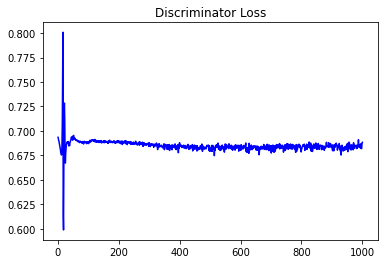

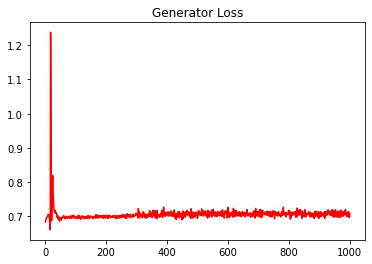

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.40547502266432894


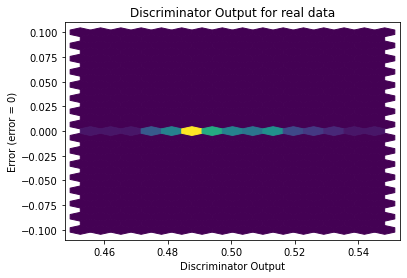

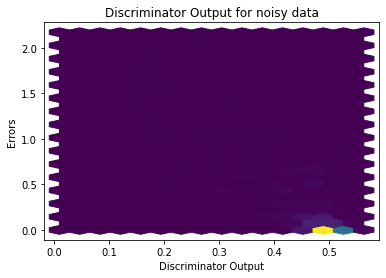

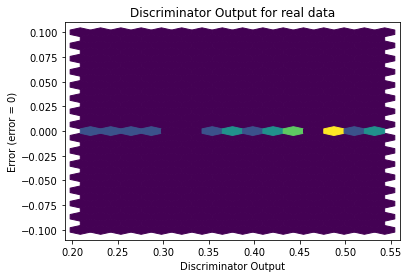

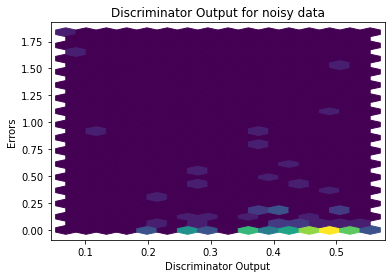

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


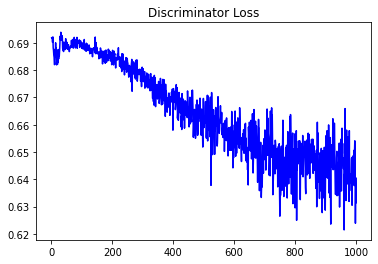

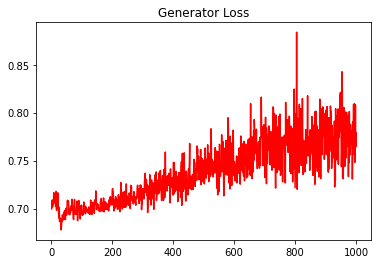

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.495214375010458


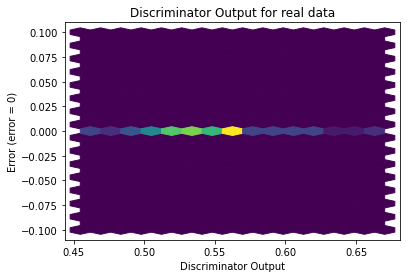

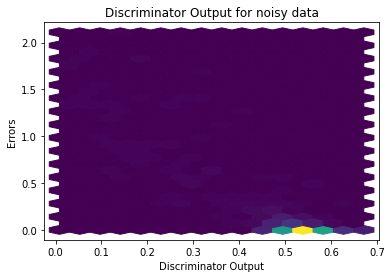

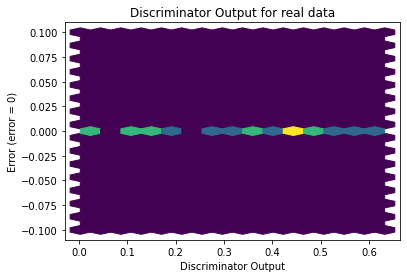

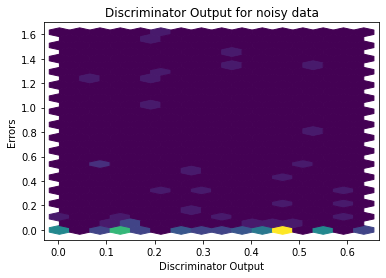

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1950]], requires_grad=True)
